In [1]:
import requests
import json
import pandas as pd

data = requests.get('https://resultados.tse.jus.br/oficial/ele2022/544/dados-simplificados/br/br-c0001-e000544-r.json')

json_data = json.loads(data.content)

candidato = []
partido = []
votos = []
porcentagem = []

#variáveis para facilitar a leitura do código
dados_candidato = 'cand'
sequencia = 'seq'
nome_candidato = 'nm'
n_votos = 'vap'
porcentagem_votos = 'pvap'
nome_partido = 'cc'


for informacoes in json_data[dados_candidato]:
    
    if informacoes[sequencia] in ['1', '2', '3', '4']:
        candidato.append(informacoes[nome_candidato])
        votos.append(informacoes[n_votos])
        porcentagem.append(informacoes[porcentagem_votos])
        partido.append(informacoes[nome_partido][:3])#[:3] para limitar o tamanho da string
        
df_eleicao = pd.DataFrame(list(zip(candidato, votos, porcentagem, partido)), columns = [
    'Candidato ', ' Numero de Votos', ' Porcentagem', ' Partido'
])

print(df_eleicao)
print(" ")
print('Total em porcentagem de urnas apuradas:',json_data['pst'],'%')
print(" ")
print('A diferenca de votos entre o primeiro e o segundo lugar eh:', int(votos[0]) - int(votos[1]))
print(" ")
print('Total de votos nulos:',json_data['vn'])

#print(partido)

#print(votos[0])

       Candidato   Numero de Votos  Porcentagem  Partido
0            LULA         57259504        48,43      PT 
1  JAIR BOLSONARO         51072345        43,20      PL 
2    SIMONE TEBET          4915423         4,16      MDB
3      CIRO GOMES          3599287         3,04      PDT
 
Total em porcentagem de urnas apuradas: 100,00 %
 
A diferenca de votos entre o primeiro e o segundo lugar eh: 6187159
 
Total de votos nulos: 3487874


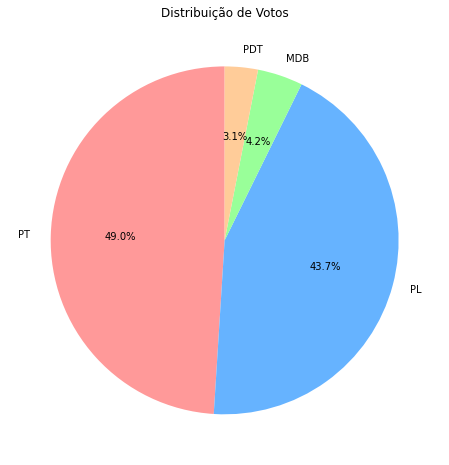

In [27]:
import matplotlib.pyplot as plt


labels = df_eleicao[' Partido']
sizes = df_eleicao[' Numero de Votos']

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Cria o gráfico de pizza
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Define o título do gráfico
ax1.set_title("Distribuição de Votos")

# Mostra o gráfico na tela
plt.show()